<a href="https://colab.research.google.com/github/mheidari98/Movie-Recommender-Systems/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data_Preparation

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB :
    from google.colab import drive
    drive.mount('/content/drive')

if IN_COLAB :
  Dataset_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/"
else :
  Dataset_path = "./DataSets/"

ml_path = Dataset_path + "ml-latest/"

## Installing required libraries

In [2]:
if IN_COLAB :
    !pip3 install jenkspy

## Imports

In [4]:
# %matplotlib notebook

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from xgboost import XGBRegressor



import re
import requests
from bs4 import BeautifulSoup
import os
import pickle
import wordcloud as wc
import scipy.sparse as sparse
import xgboost as xgb
import random
import jenkspy
import statsmodels.tools.tools as stattools
from itertools import combinations

import sklearn
from sklearn import preprocessing, tree
from sklearn.model_selection import KFold,train_test_split
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import graphviz 
import numbers
import random

%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

## load datasets

In [5]:
links = pd.read_csv( ml_path + "links.csv")
movies = pd.read_csv( ml_path + "movies.csv")
ratings = pd.read_csv( ml_path + "ratings.csv")
tags = pd.read_csv( ml_path + "tags.csv")

genome_scores = pd.read_csv( ml_path + "genome-scores.csv")
genome_tags = pd.read_csv( ml_path + "genome-tags.csv")

In [6]:
IMDb_movies = pd.read_csv( Dataset_path+"IMDb movies extensive dataset/IMDb movies.csv", dtype={"year": "string"} )
IMDb_names = pd.read_csv( Dataset_path+"IMDb movies extensive dataset/IMDb names.csv")
IMDb_ratings = pd.read_csv( Dataset_path+"IMDb movies extensive dataset/IMDb ratings.csv")
IMDb_title_principals = pd.read_csv( Dataset_path+"IMDb movies extensive dataset/IMDb title_principals.csv")

## df_Show function

In [7]:
def df_Show( df, n=40 ):
    print( 'Dataset shape = ', df.shape)
    print("-"*n)
    display( df.loc[0] )
    print("-"*n)
    display( df.info(verbose=True) )
    print("-"*n)
    display( df.describe(include='all') )

## MovieLens Dataset

### links 

In [8]:
df_Show( links )

Dataset shape =  (58098, 3)
----------------------------------------


movieId         1.0
imdbId     114709.0
tmdbId        862.0
Name: 0, dtype: float64

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   imdbId   58098 non-null  int64  
 2   tmdbId   57917 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


None

----------------------------------------


,movieId,imdbId,tmdbId
count,58098.000000,5.809800e+04,57917.000000
mean,111919.516197,1.192737e+06,133501.495761
std,59862.660956,1.701589e+06,133007.815686
min,1.000000,1.000000e+00,2.000000
25%,72437.750000,8.050625e+04,32194.000000
50%,126549.000000,2.905645e+05,77269.000000
75%,161449.500000,1.724964e+06,209231.000000
max,193886.000000,9.038520e+06,549443.000000


In [9]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     181
dtype: int64

In [10]:
del links['tmdbId']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F83987D90>,
      dtype=object)

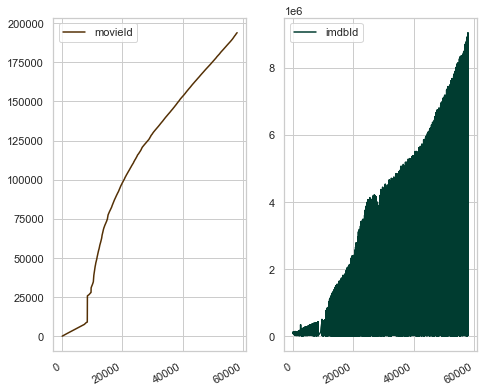

In [11]:
links.plot(kind='line', colormap='BrBG', subplots=True,layout=(2,5), figsize=(20,15))

### movies 

In [12]:
df_Show( movies )

Dataset shape =  (58098, 3)
----------------------------------------


movieId                                              1
title                                 Toy Story (1995)
genres     Adventure|Animation|Children|Comedy|Fantasy
Name: 0, dtype: object

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


None

----------------------------------------


,movieId,title,genres
count,58098.000000,58098,58098
unique,NaN,58020,1643
top,NaN,The Midnight Man (2016),Drama
freq,NaN,2,8402
mean,111919.516197,NaN,NaN
std,59862.660956,NaN,NaN
min,1.000000,NaN,NaN
25%,72437.750000,NaN,NaN
50%,126549.000000,NaN,NaN
75%,161449.500000,NaN,NaN


In [13]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
del movies['title']

Adventure :  4067
Animation :  2663
Children :  2749
Comedy :  15956
Fantasy :  2637
Romance :  7412
Drama :  24144
Action :  7130
Crime :  5105
Thriller :  8216
Horror :  5555
Mystery :  2773
Sci-Fi :  3444
IMAX :  197
Documentary :  5118
War :  1820
Musical :  1113
Western :  1378
Film-Noir :  364
(no genres listed) :  4266


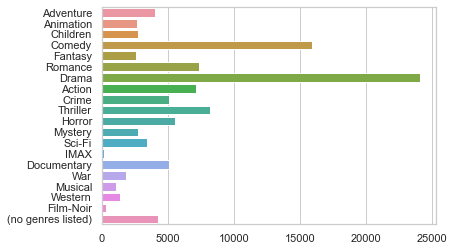

In [15]:
freq = {}

for item in movies['genres']:
    for subitem in item.split('|'):
        if (subitem in freq):
            freq[subitem] += 1
        else:
            freq[subitem] = 1

for key, value in freq.items():
    print ("% s : % d"%(key, value))
    
# plt.barh(*zip(*freq.items()))
sns.barplot(y=list(freq.keys()), x=list(freq.values()), orient='h')

In [16]:
movies[ movies['genres'].str.contains("Drama") ].head()

,movieId,genres
3,4,Comedy|Drama|Romance
10,11,Comedy|Drama|Romance
13,14,Drama
15,16,Crime|Drama
16,17,Drama|Romance


### ratings

In [17]:
df_Show( ratings )

Dataset shape =  (27753444, 4)
----------------------------------------


userId       1.000000e+00
movieId      3.070000e+02
rating       3.500000e+00
timestamp    1.256677e+09
Name: 0, dtype: float64

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


None

----------------------------------------


,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [18]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:
from datetime import datetime

# strftime('%Y-%m-%d %H:%M:%S')
ratings['year_rated'] = ratings['timestamp'].apply(lambda x: int( datetime.fromtimestamp( x ).strftime('%Y') ) )

In [20]:
test01 = ratings.groupby(['year_rated']).count()['userId']
test02 = test01.cumsum()

In [21]:
users_range = []
movies_range = []

for i in range(1995, 2019):
    temp = ratings[ ratings['year_rated'].between(1995, i)]

    users_range.append( temp.groupby('userId').count().shape[0] )
    movies_range.append( temp.groupby('movieId').count().shape[0] )
    
users_seri = pd.Series(users_range ,index=test02.index )
movies_seri = pd.Series(movies_range ,index=test02.index )

Text(0.5, 1.0, 'cumulative rating')

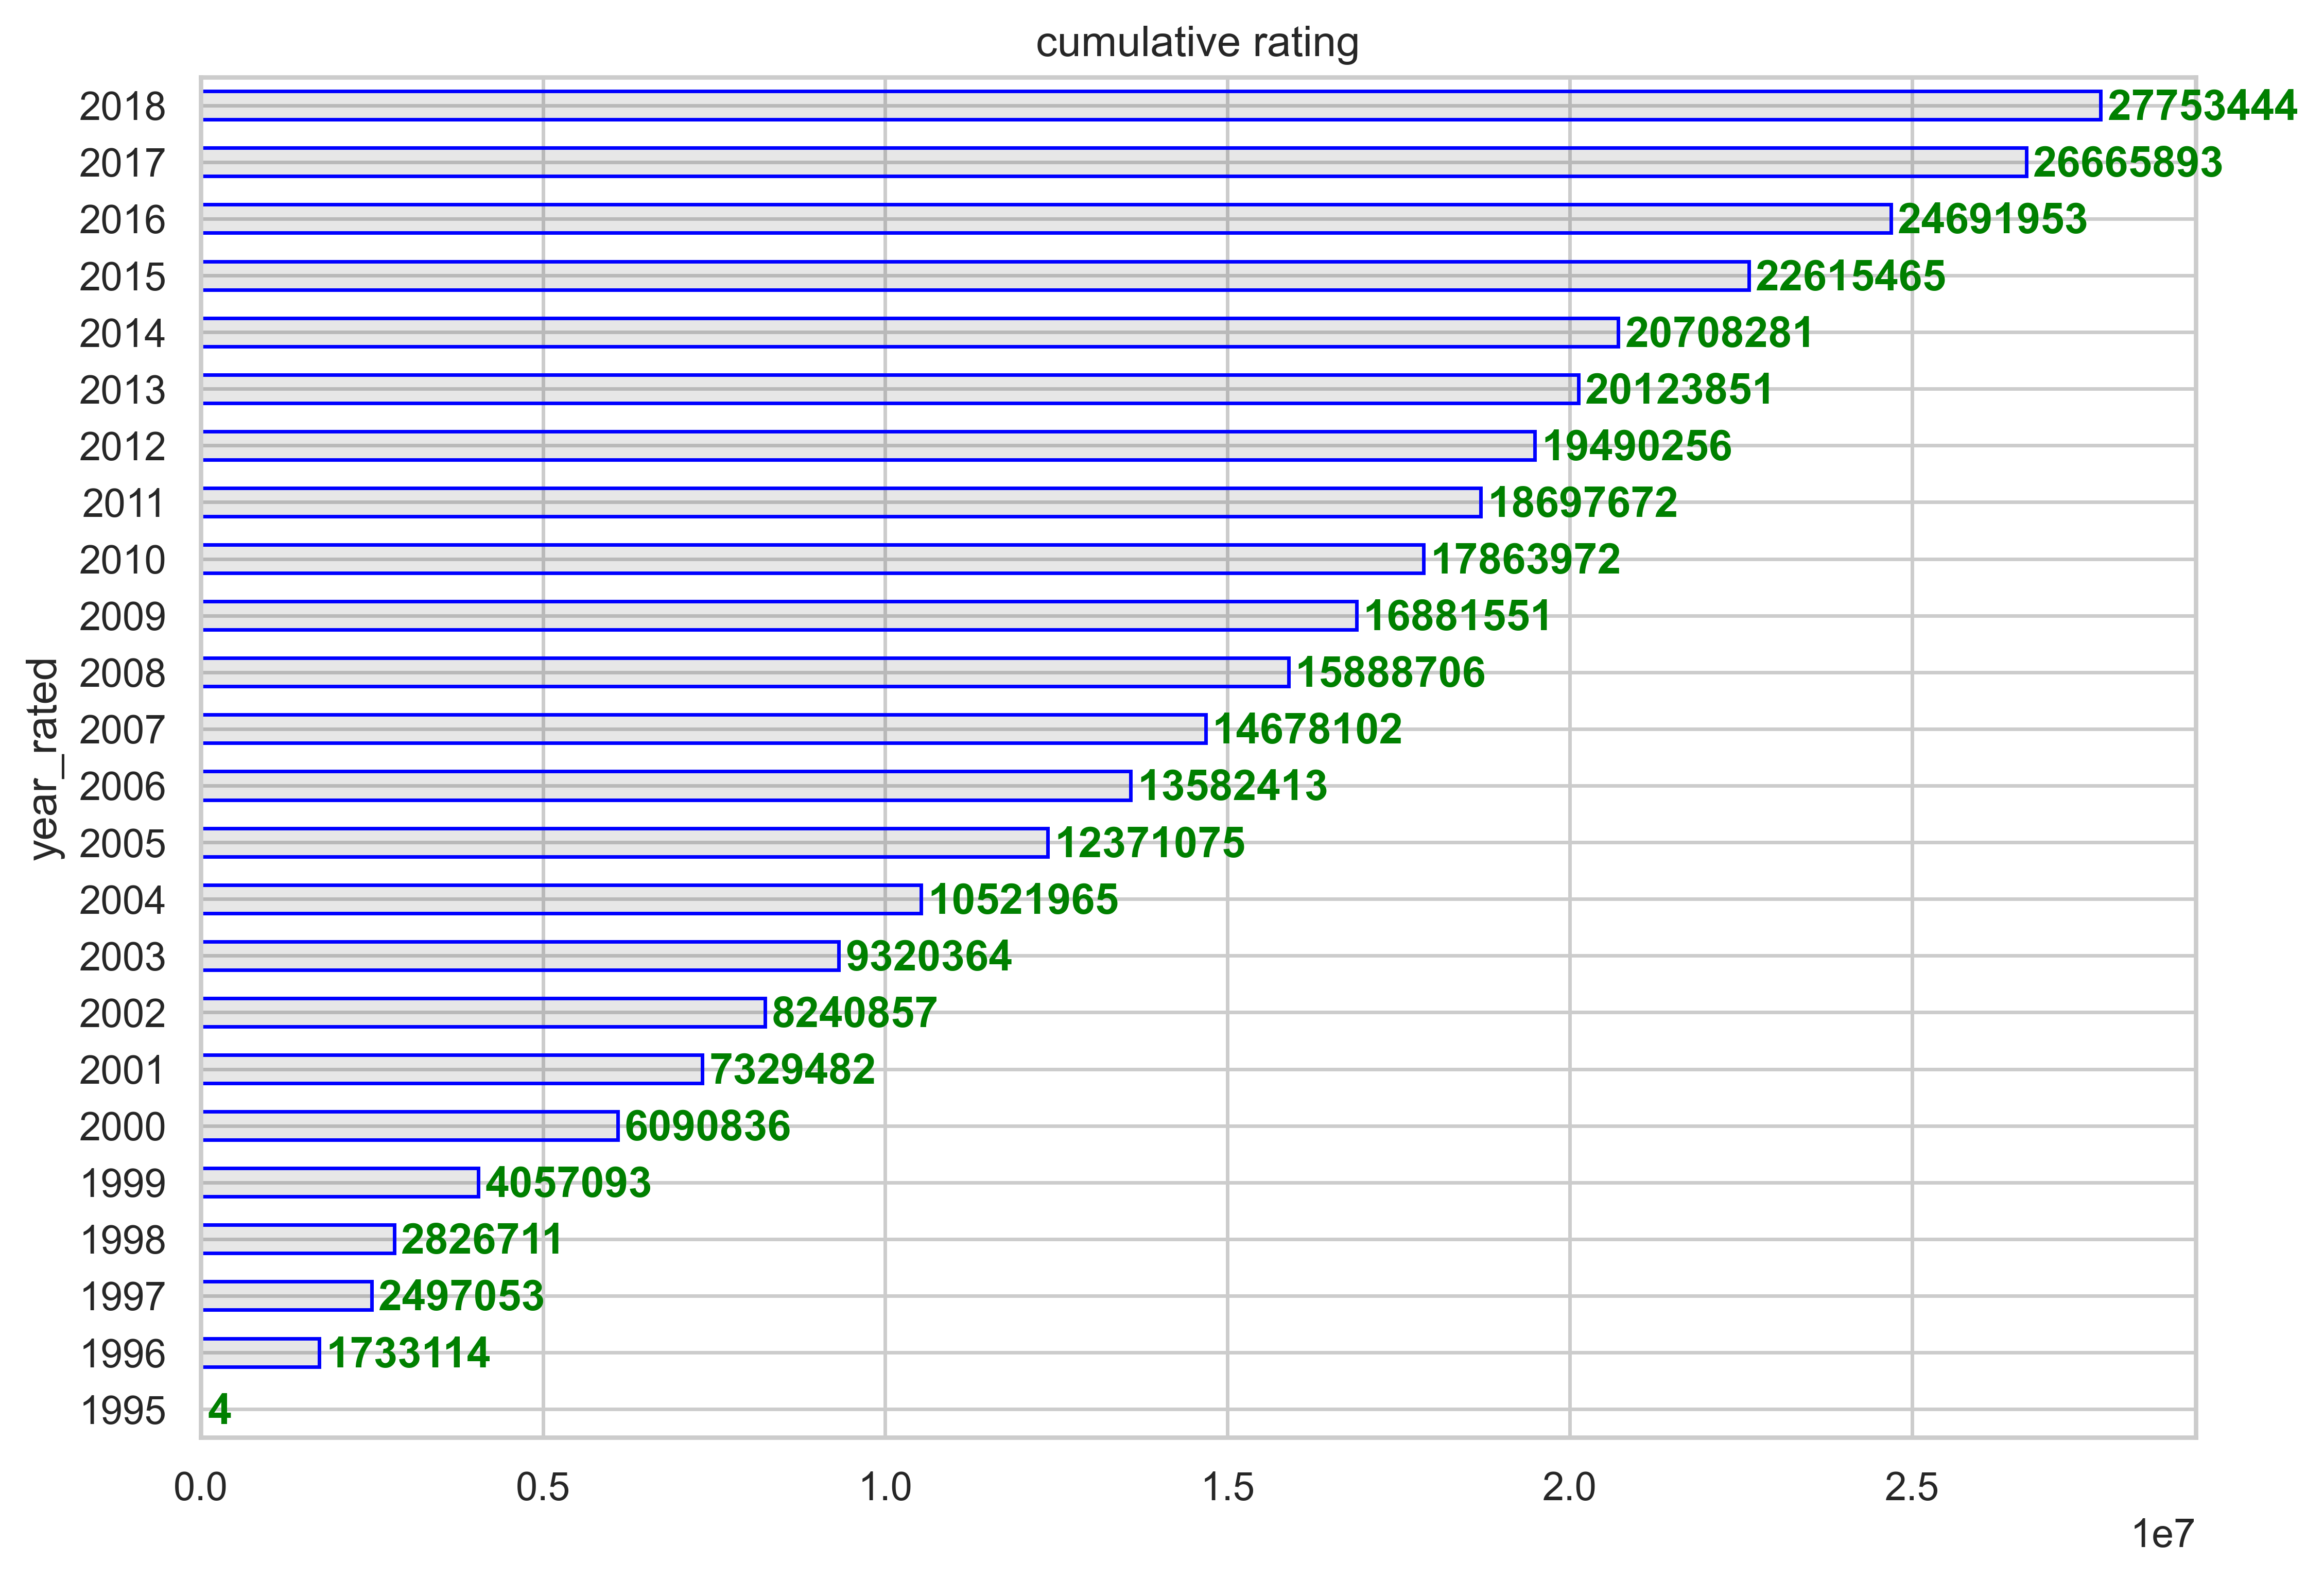

In [22]:
plt.subplots(figsize =(10, 7), dpi=500)
test02.plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
for i, v in enumerate( test02.values ):
    plt.text(v + 100000, i - .25, str(v), color='green', fontweight='bold')
    
plt.title('cumulative rating')

Text(0.5, 1.0, 'user count')

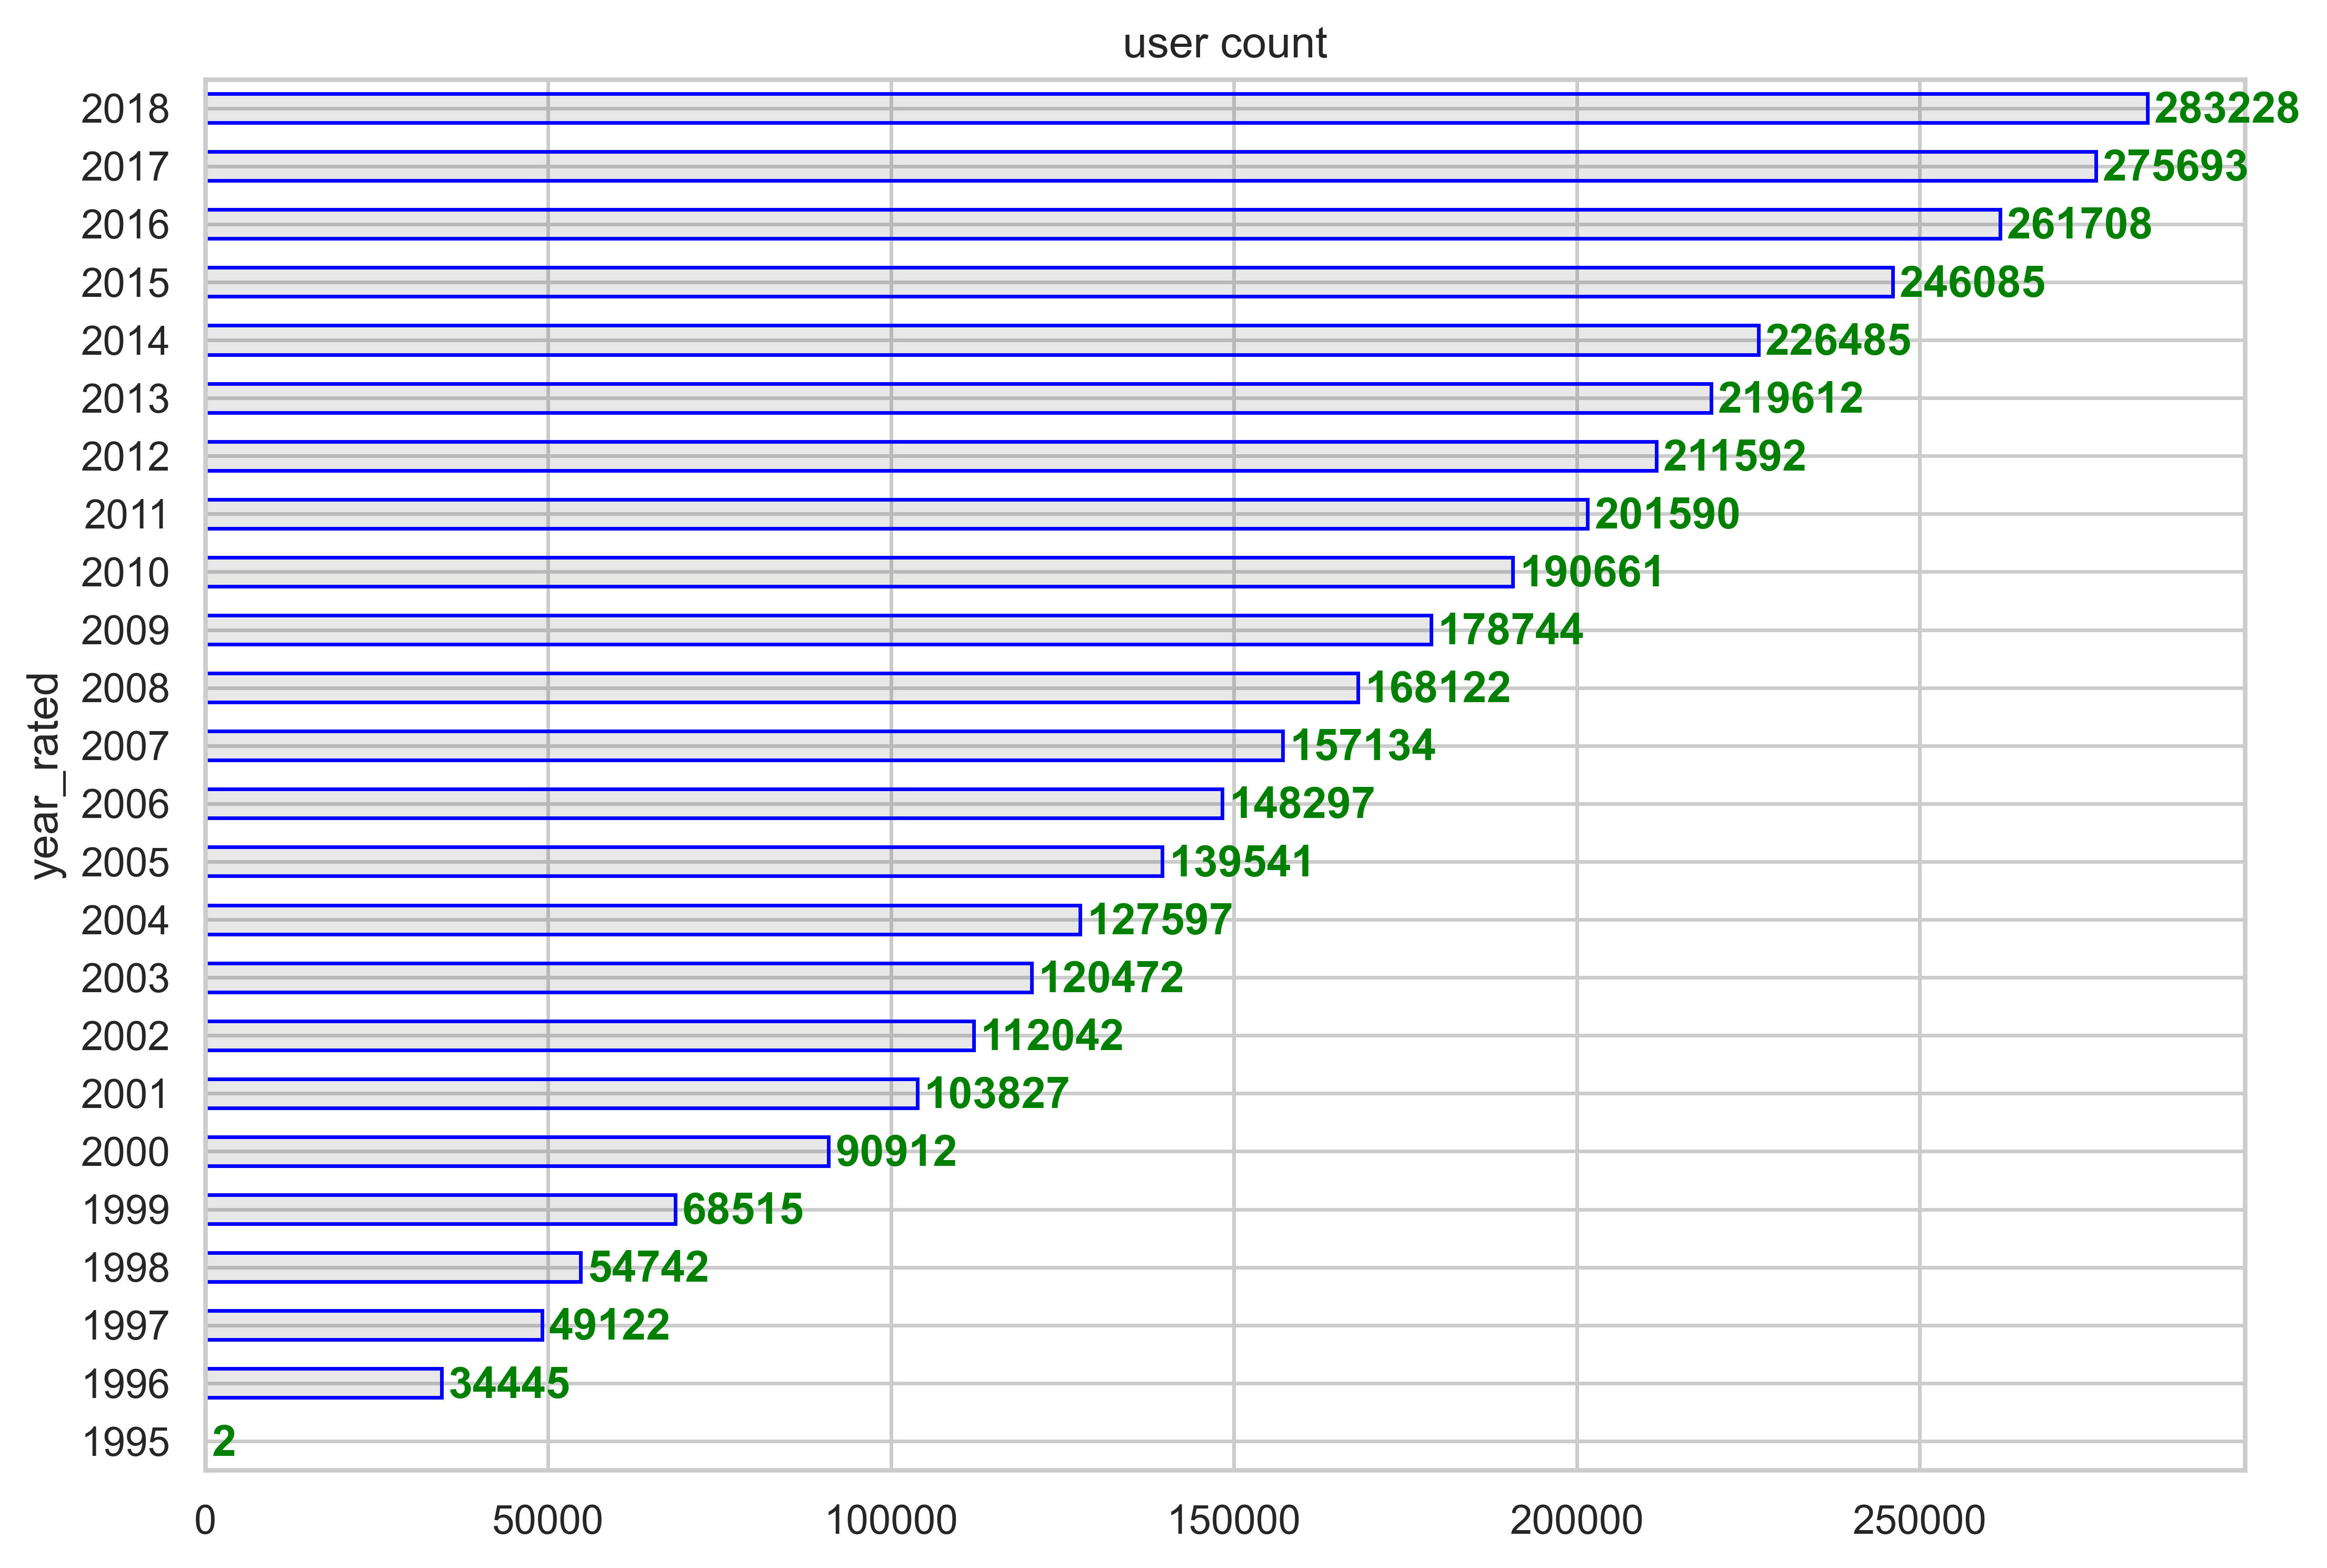

In [23]:
plt.subplots(figsize =(10, 7), dpi=500)
users_seri.plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
for i, v in enumerate( users_seri.values ):
    plt.text(v + 1000, i - .25, str(v), color='green', fontweight='bold')
    
plt.title('user count')

Text(0.5, 1.0, 'movie count')

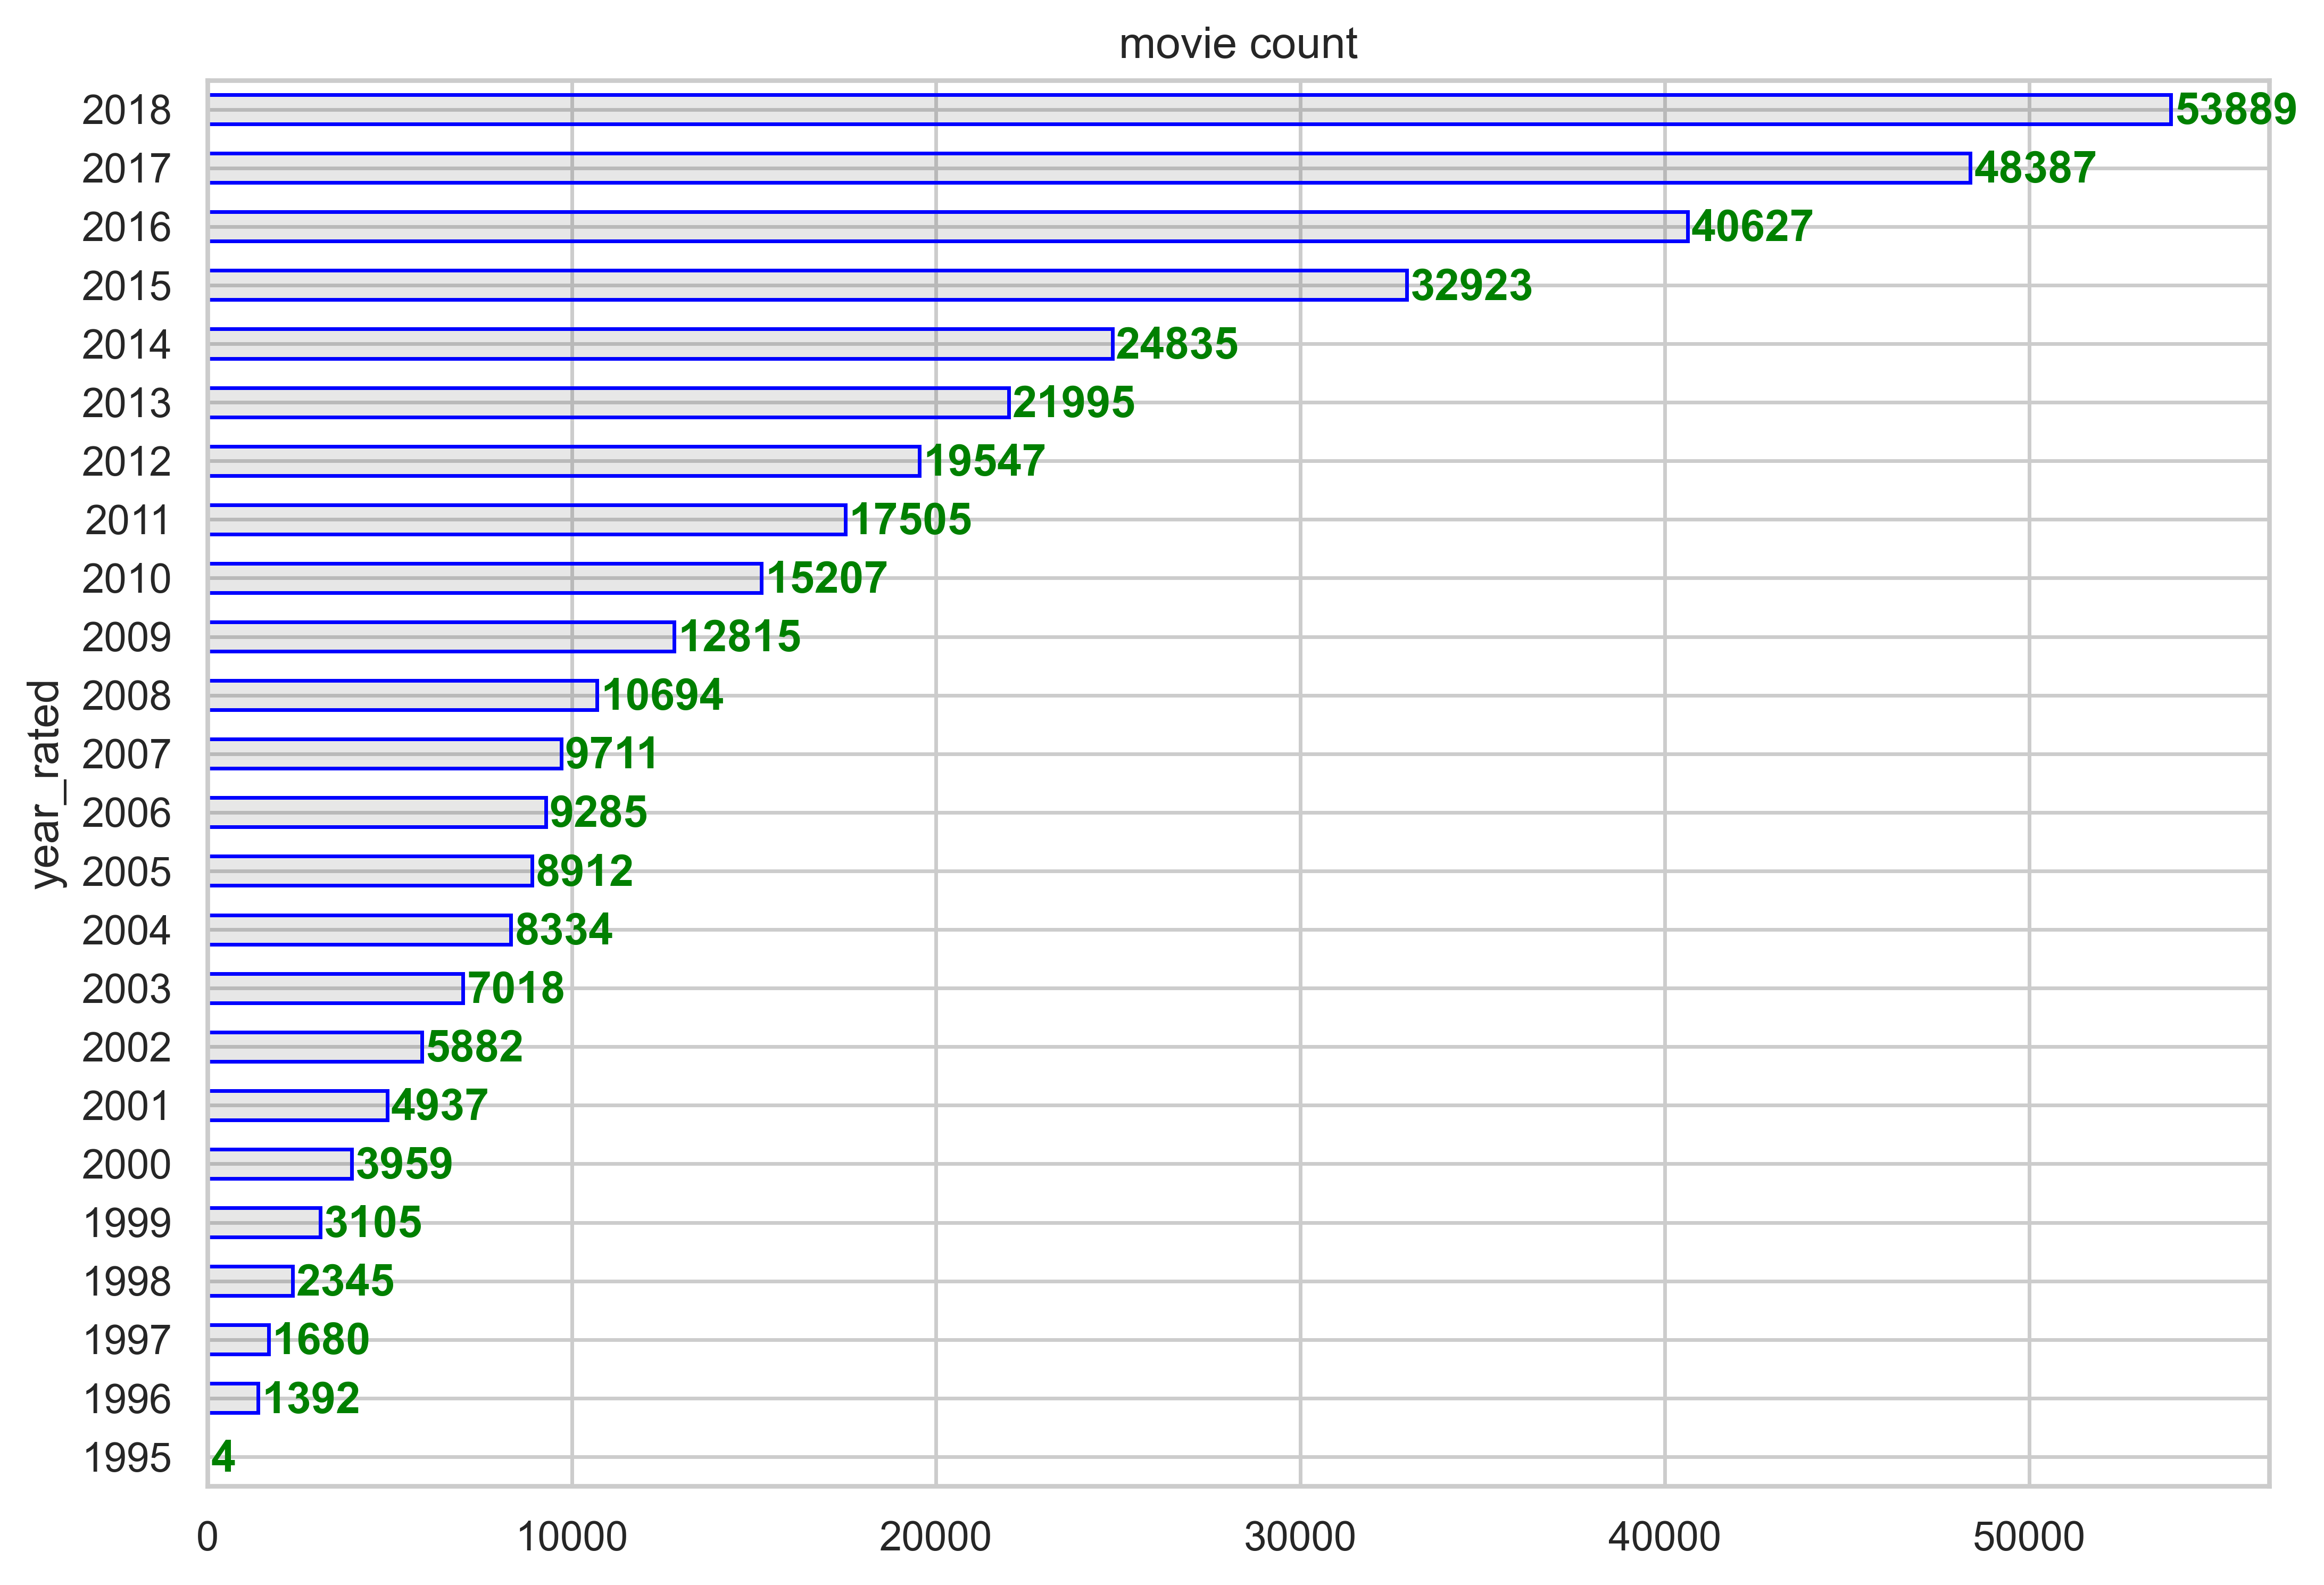

In [24]:
plt.subplots(figsize =(10, 7), dpi=500)
movies_seri.plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
for i, v in enumerate( movies_seri.values ):
    plt.text(v + 100, i - .25, str(v), color='green', fontweight='bold')
    
plt.title('movie count')

In [25]:
# del ratings['timestamp']

In [26]:
z = ratings['rating'].value_counts()
z

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

<BarContainer object of 10 artists>

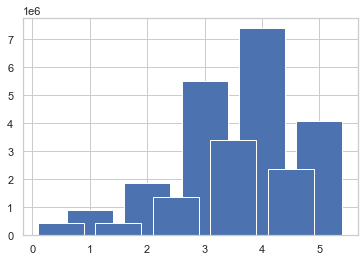

In [27]:
plt.bar( z.index, z.values )

In [28]:
ratings['movieId'].value_counts()

318       97999
356       97040
296       92406
593       87899
2571      84545
          ...  
182317        1
170171        1
149562        1
151521        1
127705        1
Name: movieId, Length: 53889, dtype: int64

In [29]:
ratings['userId'].value_counts()

123100    23715
117490     9279
134596     8381
212343     7884
242683     7515
          ...  
244681        1
69163         1
203079        1
184554        1
35319         1
Name: userId, Length: 283228, dtype: int64

In [30]:
CleanedRatings = ratings[ ratings['year_rated'].between(1995, 2001)].copy()

CleanedRatings.reset_index(drop=True, inplace=True)

print( f"number of Ratings : { CleanedRatings.shape[0] }")
print( f"number of movies : { CleanedRatings.groupby('movieId').count().shape[0] }")
print( f"number of users : { CleanedRatings.groupby('userId').count().shape[0] }")
print( f"range of rating : ( { np.min( CleanedRatings.groupby('rating').count().index )}, {np.max( CleanedRatings.groupby('rating').count().index )})  ")

number of Ratings : 7329482
number of movies : 4937
number of users : 103827
range of rating : ( 1.0, 5.0)  


In [31]:
for i in range(1996,2005):
    CleanedRatings = ratings[ ratings['year_rated'].between(1995, i)].copy()
    CleanedRatings.reset_index(drop=True, inplace=True)
    CleanedRatings[ ['userId', 'movieId', 'rating', 'timestamp']].to_csv(Dataset_path +f"ratings_{i}.csv", index=False)
    
    
    ratingGroupByUserId = CleanedRatings.groupby(['userId'])
    # ratingThreshHold = ratingGroupByUserId.apply(lambda grp: grp.rating.median() ) 
    ratingThreshHold = ratingGroupByUserId.apply(lambda grp: np.percentile(grp.rating, 50) )
    ratingThreshHold = ratingThreshHold.to_frame().reset_index()
    tmpp = pd.merge( CleanedRatings, ratingThreshHold , how='inner' )
    CleanedRatings = tmpp[ tmpp['rating']>=tmpp[0] ].reset_index()[ ['userId', 'movieId', 'rating', 'timestamp']]
    CleanedRatings.to_csv(Dataset_path +f"ratings_{i}_50p.csv", index=False)

In [32]:
for i in range(1996,2005):
    ratingsI = pd.read_csv( Dataset_path +f"ratings_{i}.csv")
    
    ratingGroupByUserId = ratingsI.groupby(['userId'])
    # ratingThreshHold = ratingGroupByUserId.apply(lambda grp: grp.rating.median() )
    ratingThreshHold = ratingGroupByUserId.apply(lambda grp: np.percentile(grp.rating, 75) )
    ratingThreshHold = ratingThreshHold.to_frame().reset_index()
    tmpp = pd.merge( ratingsI, ratingThreshHold , how='inner' )
    CleanedRatings = tmpp[ tmpp['rating']>=tmpp[0] ].reset_index()[ ['userId', 'movieId', 'rating', 'timestamp']]
    CleanedRatings.to_csv(Dataset_path +f"ratings_{i}_75p.csv", index=False)

In [33]:
df = pd.DataFrame(columns=['100', '50', '25'])
for i in range(1996,2005):
    a = pd.read_csv( Dataset_path +f"ratings_{i}.csv").shape[0]
    b = pd.read_csv( Dataset_path +f"ratings_{i}_50p.csv").shape[0]
    c = pd.read_csv( Dataset_path +f"ratings_{i}_75p.csv").shape[0]
    
    df.loc[i] = [a,b,c]
df

,100,50,25
1996,1733114,1297392,786100
1997,2497053,1855793,1136257
1998,2826711,2080912,1288192
1999,4057093,2912013,1850893
2000,6090836,4293577,2789130
2001,7329482,5134124,3363219
2002,8240857,5754436,3780699
2003,9320364,6431946,4212461
2004,10521965,7160170,4668900


### tags

In [34]:
df_Show( tags )

Dataset shape =  (1108997, 4)
----------------------------------------


userId               14
movieId             110
tag                epic
timestamp    1443148538
Name: 0, dtype: object

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1108997 non-null  int64 
 1   movieId    1108997 non-null  int64 
 2   tag        1108981 non-null  object
 3   timestamp  1108997 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


None

----------------------------------------


,userId,movieId,tag,timestamp
count,1.108997e+06,1.108997e+06,1108981,1.108997e+06
unique,NaN,NaN,74714,NaN
top,NaN,NaN,sci-fi,NaN
freq,NaN,NaN,9400,NaN
mean,1.248016e+05,5.492109e+04,NaN,1.413544e+09
std,7.726964e+04,5.618123e+04,NaN,1.144358e+08
min,1.400000e+01,1.000000e+00,NaN,1.135429e+09
25%,7.340600e+04,3.362000e+03,NaN,1.323903e+09
50%,1.030130e+05,4.374400e+04,NaN,1.446994e+09
75%,1.883600e+05,9.682100e+04,NaN,1.525549e+09


In [35]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [36]:
tags['tag'].value_counts()

sci-fi                            9400
atmospheric                       6430
action                            6219
comedy                            5923
surreal                           5299
                                  ... 
canadiana                            1
prequelTo:Silence of the Lambs       1
Joshua Michael Stern                 1
small city                           1
oreo                                 1
Name: tag, Length: 74714, dtype: int64

In [37]:
len(list(tags['tag'].unique()))

74715

In [38]:
tags[tags['userId']==14]

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195
5,14,318,justice,1442615192
6,14,480,Dinosaurs,1443148563
7,14,593,psychothriller,1444014286
8,14,1682,philosophy,1442615158
9,14,1682,surveillance,1442615167


### genome_scores

In [39]:
df_Show( genome_scores )

Dataset shape =  (14862528, 3)
----------------------------------------


movieId      1.000
tagId        1.000
relevance    0.029
Name: 0, dtype: float64

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


None

----------------------------------------


,movieId,tagId,relevance
count,1.486253e+07,1.486253e+07,1.486253e+07
mean,3.997087e+04,5.645000e+02,1.153631e-01
std,4.814930e+04,3.256254e+02,1.554320e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.680750e+03,2.827500e+02,2.300000e-02
50%,7.880000e+03,5.645000e+02,5.450000e-02
75%,7.124900e+04,8.462500e+02,1.390000e-01
max,1.875950e+05,1.128000e+03,1.000000e+00


In [40]:
genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

### genome_tags

In [41]:
df_Show( genome_tags )

Dataset shape =  (1128, 2)
----------------------------------------


tagId      1
tag      007
Name: 0, dtype: object

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


None

----------------------------------------


,tagId,tag
count,1128.000000,1128
unique,NaN,1128
top,NaN,good versus evil
freq,NaN,1
mean,564.500000,NaN
std,325.769857,NaN
min,1.000000,NaN
25%,282.750000,NaN
50%,564.500000,NaN
75%,846.250000,NaN


In [42]:
genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

## imdb extensive dataset

### IMDb_movies

In [43]:
df_Show( IMDb_movies )

Dataset shape =  (85855, 22)
----------------------------------------


imdb_title_id                                                    tt0000009
title                                                           Miss Jerry
original_title                                                  Miss Jerry
year                                                                  1894
date_published                                                  1894-10-09
genre                                                              Romance
duration                                                                45
country                                                                USA
language                                                              None
director                                                   Alexander Black
writer                                                     Alexander Black
production_company                              Alexander Black Photoplays
actors                   Blanche Bayliss, William Courtenay, Chauncey D...
description              

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  string 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote     

None

----------------------------------------


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,85855,85855,85855,85855,85855,85855,85855.000000,85791,85022,85768,...,85786,83740,85855.000000,8.585500e+04,23710,15326,31016,13305.000000,78258.000000,74058.000000
unique,85855,82094,80852,113,22012,1257,NaN,4907,4377,34733,...,85729,83611,NaN,NaN,4642,14857,30414,NaN,NaN,NaN
top,tt1194660,Anna,Anna,2017,2010,Drama,NaN,USA,English,Jesús Franco,...,"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",The story of,NaN,NaN,$ 1000000,$ 1000000,$ 8144,NaN,NaN,NaN
freq,1,10,10,3329,113,12543,NaN,28511,35939,87,...,9,15,NaN,NaN,758,19,15,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,100.351418,NaN,NaN,NaN,...,NaN,NaN,5.898656,9.493490e+03,NaN,NaN,NaN,55.896881,46.040826,27.479989
std,NaN,NaN,NaN,NaN,NaN,NaN,22.553848,NaN,NaN,NaN,...,NaN,NaN,1.234987,5.357436e+04,NaN,NaN,NaN,17.784874,178.511411,58.339158
min,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,9.900000e+01,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,NaN,NaN,NaN,...,NaN,NaN,5.200000,2.050000e+02,NaN,NaN,NaN,43.000000,4.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,96.000000,NaN,NaN,NaN,...,NaN,NaN,6.100000,4.840000e+02,NaN,NaN,NaN,57.000000,9.000000,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,108.000000,NaN,NaN,NaN,...,NaN,NaN,6.800000,1.766500e+03,NaN,NaN,NaN,69.000000,27.000000,23.000000


In [44]:
IMDb_movies.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [45]:
IMDb_movies['actors']

0        Blanche Bayliss, William Courtenay, Chauncey D...
1        Elizabeth Tait, John Tait, Norman Campbell, Be...
2        Asta Nielsen, Valdemar Psilander, Gunnar Helse...
3        Helen Gardner, Pearl Sindelar, Miss Fielding, ...
4        Salvatore Papa, Arturo Pirovano, Giuseppe de L...
                               ...                        
85850    Dany Boon, Philippe Katerine, Anne Serra, Samu...
85851    Herman Finkers, Johanna ter Steege, Leonie ter...
85852    Anoop Chandran, Indrans, Sona Nair, Simon Brit...
85853    Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...
85854    Maria Morera Colomer, Biel Rossell Pelfort, Is...
Name: actors, Length: 85855, dtype: object

### IMDb_names

In [46]:
df_Show( IMDb_names )

Dataset shape =  (297705, 17)
----------------------------------------


imdb_name_id                                                     nm0000001
name                                                          Fred Astaire
birth_name                                         Frederic Austerlitz Jr.
height                                                                 177
bio                      Fred Astaire was born in Omaha, Nebraska, to J...
birth_details                         May 10, 1899 in Omaha, Nebraska, USA
date_of_birth                                                   1899-05-10
place_of_birth                                        Omaha, Nebraska, USA
death_details            June 22, 1987 in Los Angeles, California, USA ...
date_of_death                                                   1987-06-22
place_of_death                              Los Angeles, California, USA  
reason_of_death                                                  pneumonia
spouses_string           Robyn Smith  (27 June 1980 - 22 June 1987) (hi...
spouses                  

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297705 entries, 0 to 297704
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   imdb_name_id           297705 non-null  object 
 1   name                   297705 non-null  object 
 2   birth_name             297705 non-null  object 
 3   height                 44681 non-null   float64
 4   bio                    204698 non-null  object 
 5   birth_details          110612 non-null  object 
 6   date_of_birth          110612 non-null  object 
 7   place_of_birth         103992 non-null  object 
 8   death_details          39933 non-null   object 
 9   date_of_death          39933 non-null   object 
 10  place_of_death         37038 non-null   object 
 11  reason_of_death        22694 non-null   object 
 12  spouses_string         45352 non-null   object 
 13  spouses                297705 non-null  int64  


None

----------------------------------------


,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
count,297705,297705,297705,44681.000000,204698,110612,110612,103992,39933,39933,37038,22694,45352,297705.000000,297705.000000,297705.000000,297705.000000
unique,297705,291011,292421,NaN,204627,106879,45283,22335,39221,21269,8151,1975,45063,NaN,NaN,NaN,NaN
top,nm0004706,Dinesh,Dinesh,NaN,Diego Baldenweg (composer) with Nora Baldenweg...,1957,1957,"New York City, New York, USA",1996,1995,"Los Angeles, California, USA",undisclosed,? (? - present) (1 child),NaN,NaN,NaN,NaN
freq,1,9,9,NaN,3,47,47,3011,19,19,2332,5671,45,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,175.007162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208690,0.071722,0.104866,0.196439
std,NaN,NaN,NaN,14.055496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.570208,0.348499,0.349762,0.721257
min,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,168.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


In [47]:
IMDb_movies.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

### IMDb_ratings

In [48]:
df_Show( IMDb_ratings )

Dataset shape =  (85855, 49)
----------------------------------------


imdb_title_id                tt0000009
weighted_average_vote              5.9
total_votes                        154
mean_vote                          5.9
median_vote                          6
votes_10                            12
votes_9                              4
votes_8                             10
votes_7                             43
votes_6                             28
votes_5                             28
votes_4                              9
votes_3                              1
votes_2                              5
votes_1                             14
allgenders_0age_avg_vote           7.2
allgenders_0age_votes                4
allgenders_18age_avg_vote            6
allgenders_18age_votes              38
allgenders_30age_avg_vote          5.7
allgenders_30age_votes              50
allgenders_45age_avg_vote          6.6
allgenders_45age_votes              35
males_allages_avg_vote             6.2
males_allages_votes                 97
males_0age_avg_vote      

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes

None

----------------------------------------


,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,85855,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,...,84911.000000,84911.000000,83057.000000,83057.000000,85176.000000,85176.000000,85646.000000,85646.000000,85854.000000,85854.000000
unique,85855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,tt1194660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,...,6.071223,685.655451,6.022226,196.065341,5.155706,76.110231,5.925910,1647.822537,5.749638,4332.940865
std,NaN,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,...,1.454370,3732.376186,1.541895,842.979585,1.290920,124.264020,1.308087,8455.978158,1.285570,23243.807279
min,NaN,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,...,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000
50%,NaN,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,...,6.300000,27.000000,6.200000,16.000000,5.300000,29.000000,6.100000,81.000000,6.000000,225.000000
75%,NaN,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,290.000000,...,7.000000,109.000000,7.000000,62.000000,6.000000,77.000000,6.800000,335.000000,6.700000,841.000000


In [49]:
IMDb_ratings.isna().sum()

imdb_title_id                    0
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8                          0
votes_7                          0
votes_6                          0
votes_5                          0
votes_4                          0
votes_3                          0
votes_2                          0
votes_1                          0
allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes   

### IMDb_title_principals

In [50]:
df_Show( IMDb_title_principals )

Dataset shape =  (835513, 6)
----------------------------------------


imdb_title_id                                   tt0000009
ordering                                                1
imdb_name_id                                    nm0063086
category                                          actress
job                                                   NaN
characters       ["Miss Geraldine Holbrook (Miss Jerry)"]
Name: 0, dtype: object

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835513 entries, 0 to 835512
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   imdb_title_id  835513 non-null  object
 1   ordering       835513 non-null  int64 
 2   imdb_name_id   835513 non-null  object
 3   category       835513 non-null  object
 4   job            212731 non-null  object
 5   characters     340836 non-null  object
dtypes: int64(1), object(5)
memory usage: 38.2+ MB


None

----------------------------------------


,imdb_title_id,ordering,imdb_name_id,category,job,characters
count,835513,835513.000000,835513,835513,212731,340836
unique,85848,NaN,297706,12,8871,212899
top,tt1194660,NaN,nm0001553,actor,producer,"[""Self""]"
freq,10,NaN,188,222337,97837,720
mean,NaN,5.398360,NaN,NaN,NaN,NaN
std,NaN,2.837061,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,8.000000,NaN,NaN,NaN,NaN


In [51]:
IMDb_title_principals.isna().sum()

imdb_title_id         0
ordering              0
imdb_name_id          0
category              0
job              622782
characters       494677
dtype: int64

## Merge Phase

In [15]:
data01 = pd.merge(movies[['movieId','genres']],links[['movieId','imdbId']], how='inner' )

In [16]:
data01['imdbId'] = data01["imdbId"].apply(str)
data01['imdb_title_id'] = data01['imdbId'].apply(lambda x: "tt" + "0"*( 7-len(x) ) + x )
del data01['imdbId']

In [17]:
IMDb_moviesColName = ['imdb_title_id', 'title', 'year', 'duration', 'country', 'language', 'director', 'budget', 
           'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users',
          'reviews_from_critics'
          ]

data02 = pd.merge(data01, IMDb_movies[IMDb_moviesColName], how='inner')

In [18]:
data03 = pd.merge(data02, IMDb_ratings[['imdb_title_id','mean_vote','total_votes']], how='inner')

In [19]:
data03.to_csv(Dataset_path +'MoviesInfo.csv', index=False)

# Read Movies_metadata

In [108]:
Movies_metadata = pd.read_csv(Dataset_path+"MoviesInfo.csv")

In [109]:
df_Show( Movies_metadata )

Dataset shape =  (41896, 26)
----------------------------------------


movieId                                                                  1
genres                         Adventure|Animation|Children|Comedy|Fantasy
imdb_title_id                                                    tt0114709
title                                  Toy Story - Il mondo dei giocattoli
original_title                                                   Toy Story
year                                                                  1995
date_published                                                  1996-03-22
genre                                         Animation, Adventure, Comedy
duration                                                                81
country                                                                USA
language                                                           English
director                                                     John Lasseter
writer                                          John Lasseter, Pete Docter
production_company       

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41890 non-null  object 
 10  language               41648 non-null  object 
 11  director               41886 non-null  object 
 12  writer                 41621 non-null  object 
 13  production_company     40944 non-null  object 
 14  actors       

None

----------------------------------------


,movieId,genres,imdb_title_id,title,original_title,year,date_published,genre,duration,country,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,mean_vote,total_votes
count,41896.000000,41896,41896,41896,41896,41896.000000,41896,41896,41896.000000,41890,...,41896.000000,4.189600e+04,15453,13291,19887,11596.000000,40728.000000,40120.000000,41896.000000,4.189600e+04
unique,NaN,1459,41896,40608,39983,NaN,15898,995,NaN,3188,...,NaN,NaN,3173,12953,19684,NaN,NaN,NaN,NaN,NaN
top,NaN,Drama,tt0336618,Anna Karenina,The Three Musketeers,NaN,2010,Drama,NaN,USA,...,NaN,NaN,$ 5000000,$ 8144,$ 8144,NaN,NaN,NaN,NaN,NaN
freq,NaN,7024,1,6,7,NaN,33,4829,NaN,17211,...,NaN,NaN,406,17,15,NaN,NaN,NaN,NaN,NaN
mean,102950.057070,NaN,NaN,NaN,NaN,1990.199852,NaN,NaN,100.697584,NaN,...,6.152621,1.838211e+04,NaN,NaN,NaN,56.175836,72.697432,43.072258,6.379342,1.838211e+04
std,61984.583401,NaN,NaN,NaN,NaN,24.718218,NaN,NaN,21.152008,NaN,...,1.107142,7.493346e+04,NaN,NaN,NaN,17.902588,206.638549,72.837143,1.036597,7.493346e+04
min,1.000000,NaN,NaN,NaN,NaN,1906.000000,NaN,NaN,41.000000,NaN,...,1.100000,1.000000e+02,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.300000,1.000000e+02
25%,50330.000000,NaN,NaN,NaN,NaN,1973.000000,NaN,NaN,89.000000,NaN,...,5.600000,5.240000e+02,NaN,NaN,NaN,44.000000,8.000000,6.000000,5.800000,5.240000e+02
50%,117505.000000,NaN,NaN,NaN,NaN,1999.000000,NaN,NaN,97.000000,NaN,...,6.300000,1.479000e+03,NaN,NaN,NaN,57.000000,20.000000,17.000000,6.500000,1.479000e+03
75%,154804.500000,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,109.000000,NaN,...,6.900000,5.836000e+03,NaN,NaN,NaN,69.000000,54.000000,45.000000,7.100000,5.836000e+03


In [110]:
# for col in Movies_metadata.columns:
#     indices = np.where(Movies_metadata[col].isna())
#     print('{}: {} {}'.format(col, Movies_metadata[col].isnull().sum(),*indices))
    
Movies_metadata.isna().sum()

movieId                      0
genres                       0
imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      6
language                   248
director                    10
writer                     275
production_company         952
actors                      19
description                307
avg_vote                     0
votes                        0
budget                   26443
usa_gross_income         28605
worlwide_gross_income    22009
metascore                30300
reviews_from_users        1168
reviews_from_critics      1776
mean_vote                    0
total_votes                  0
dtype: int64

### binning director based on mean of mean_vote param of their movie

In [111]:
df = Movies_metadata.groupby('director').mean()['mean_vote']
Movies_metadata['director_mv'] = Movies_metadata['director'].map(df)

Movies_metadata['director_r'] = pd.cut( Movies_metadata['director_mv'], 
                                       bins=[0.0, 2.5, 5.0, 7.5, 10.0],
                                       labels=[1,2,3,4] 
                                       )

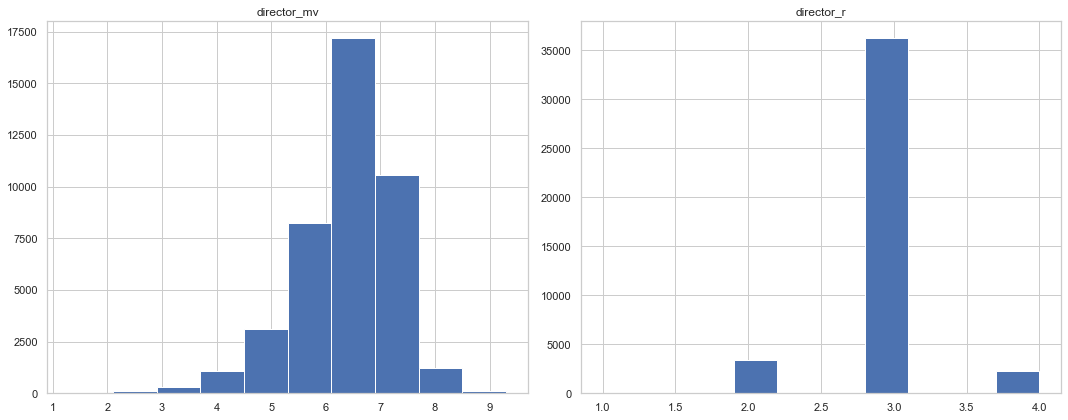

In [112]:
# plt.subplots()
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ax0.hist( Movies_metadata['director_mv'] )
ax0.set_title('director_mv')
ax1.hist( Movies_metadata['director_r'] )
ax1.set_title('director_r')

fig.tight_layout()
plt.show()

In [113]:
Movies_metadata['director_r'].value_counts()

3    36227
2     3375
4     2252
1       32
Name: director_r, dtype: int64

In [114]:
del Movies_metadata['director']
del Movies_metadata['director_mv']

In [115]:
# https://stackoverflow.com/questions/15891038/
Movies_metadata['director_r'] = pd.to_numeric( Movies_metadata['director_r'], errors='coerce')

### Modify the [budget, usa_gross_income, worlwide_gross_income] column

In [116]:
# Movies_metadata['budget_o'] = Movies_metadata['budget']
# Movies_metadata['usa_gross_income_o'] = Movies_metadata['usa_gross_income'] 
# Movies_metadata['worlwide_gross_income_o'] = Movies_metadata['worlwide_gross_income']

In [117]:
def LastIntGetter(x):
    try :
        return int( re.search("(\d+)$", x).group(1) )
    except:
        return np.NaN #'Other'
    
Movies_metadata['budget'] = Movies_metadata['budget'].apply(lambda x: LastIntGetter(x) )
Movies_metadata['usa_gross_income'] = Movies_metadata['usa_gross_income'].apply(lambda x: LastIntGetter(x) ) 
Movies_metadata['worlwide_gross_income'] = Movies_metadata['worlwide_gross_income'].apply(lambda x: LastIntGetter(x) )

### StandardScaler

In [118]:
# Movies_metadata.select_dtypes(include=np.number).columns.tolist()
col = ['year','duration','budget','usa_gross_income','worlwide_gross_income',
 'metascore','reviews_from_users','reviews_from_critics','total_votes', 'director_r' , 'mean_vote']

df1 = pd.DataFrame( preprocessing.StandardScaler().fit_transform( Movies_metadata[col] ) , columns= col )

Movies_metadata_s = pd.concat([df1, Movies_metadata[list(set(Movies_metadata.columns.to_list()) - set(col) )] ], axis=1)

Movies_metadata_s.head()

,year,duration,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,total_votes,director_r,...,avg_vote,country,imdb_title_id,movieId,title,writer,description,original_title,language,date_published
0,0.194197,-0.931251,-0.024693,4.087241,3.598124,2.168728,2.634113,1.605351,11.291203,2.782409,...,8.3,USA,tt0114709,1,Toy Story - Il mondo dei giocattoli,"John Lasseter, Pete Docter",A cowboy doll is profoundly threatened and jea...,Toy Story,English,1996-03-22
1,0.194197,0.156130,0.004691,1.608358,2.231606,-0.959447,0.882240,0.410891,3.746047,0.076677,...,7.0,USA,tt0113497,2,Jumanji,"Jonathan Hensleigh, Greg Taylor",When two kids find and play a magical board ga...,Jumanji,"English, French",1996-02-23
2,0.194197,0.014297,-0.028891,1.019487,0.383380,-0.568425,-0.037251,-0.193204,0.071530,0.076677,...,6.7,USA,tt0113228,3,That's amore! Due improbabili seduttori,"Mark Steven Johnson, Mark Steven Johnson",John and Max resolve to save their beloved bai...,Grumpier Old Men,"English, Italian, German",1996-04-18
3,0.194197,1.101678,-0.036447,0.928735,0.479351,NaN,-0.095324,-0.193204,-0.120496,0.076677,...,5.9,USA,tt0114885,4,Donne,"Terry McMillan, Terry McMillan","Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,English,1996-01-18
4,0.194197,0.250684,-0.024693,1.122618,0.432417,-0.400844,-0.013054,-0.069639,0.202914,0.076677,...,6.1,USA,tt0113041,5,Il padre della sposa 2,"Albert Hackett, Frances Goodrich",George Banks must deal not only with the pregn...,Father of the Bride Part II,English,1996-02-02


### KNNImputer

In [119]:
%%time
from sklearn.impute import KNNImputer

colMute = ['budget','usa_gross_income','worlwide_gross_income','metascore','reviews_from_users',
           'reviews_from_critics', 'director_r']

imputer = KNNImputer()
df2 = pd.DataFrame(imputer.fit_transform(Movies_metadata_s[colMute]),columns = colMute)

Movies_metadata_sm = pd.concat([df2, Movies_metadata_s[list(set(Movies_metadata.columns.to_list())-set(colMute) )]], axis=1)

# imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
# Movies_metadata[colMute] = imputer.fit_transform( Movies_metadata[colMute] )

# Movies_metadata.dropna(subset=[colMute], inplace=True)

Wall time: 6min 6s


In [120]:
Movies_metadata_sm.isna().sum()

budget                     0
usa_gross_income           0
worlwide_gross_income      0
metascore                  0
reviews_from_users         0
reviews_from_critics       0
director_r                 0
votes                      0
genres                     0
mean_vote                  0
original_title             0
date_published             0
duration                   0
genre                      0
production_company       952
actors                    19
avg_vote                   0
movieId                    0
description              307
language                 248
country                    6
total_votes                0
title                      0
year                       0
imdb_title_id              0
writer                   275
dtype: int64

### detect outlier

In [121]:
col = ['budget','usa_gross_income','worlwide_gross_income','metascore','reviews_from_users',
           'reviews_from_critics', 'director_r', 'duration']

z = np.abs(zscore(Movies_metadata_sm.loc[:,col]))
Movies_metadata_smz = Movies_metadata_sm[(z < 3).all(axis=1)].copy()

Movies_metadata_sm.shape[0], Movies_metadata_smz.shape[0]

(41896, 39470)

In [122]:
Movies_metadata = Movies_metadata_smz

### Country

In [123]:
df = pd.read_csv(Dataset_path +'Country2Continent.csv', keep_default_na=False, na_values=[''])

In [124]:
all_Continent = list( df.Continent.unique() )
# 'EU', Europe
# 'AS', Asia
# 'NA', north Americas
# 'AF', Africa
# 'AN', Antarctica
# 'SA', south Americas
# 'OC', Oceania

In [125]:
Movies_metadata.country.fillna("No Country", inplace=True)

In [126]:
%%time
# method 1
# IMDb_movies['Continent'] = IMDb_movies['country'].map(df.set_index('Country')['Continent'])

# method 2
for i in all_Continent:
    Movies_metadata[i] = 0

for index, row in Movies_metadata.iterrows():
    for subitem in row['country'].split(', '):
        co = df.loc[ df[ df.Country == subitem ].index[0] ].Continent     
        Movies_metadata.loc[ index, co ] = 1

Wall time: 2min 44s


In [127]:
Movies_metadata[['country'] + all_Continent]

,country,EU,AS,NA,AF,AN,SA,OC,idk
2,USA,0,0,1,0,0,0,0,0
3,USA,0,0,1,0,0,0,0,0
4,USA,0,0,1,0,0,0,0,0
6,"Germany, USA",1,0,1,0,0,0,0,0
7,USA,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
41891,Japan,0,1,0,0,0,0,0,0
41892,USA,0,0,1,0,0,0,0,0
41893,France,1,0,0,0,0,0,0,0
41894,Canada,0,0,1,0,0,0,0,0


### Language

In [128]:
Movies_metadata['language'] = Movies_metadata['language'].fillna('nolang')
freq = {}

for item in Movies_metadata['language']:
    for subitem in item.split(', '):
        if (subitem in freq):
            freq[subitem] += 1
        else:
            freq[subitem] = 1
    
# for key, value in freq.items():
#     print ("% s : % d"%(key, value))

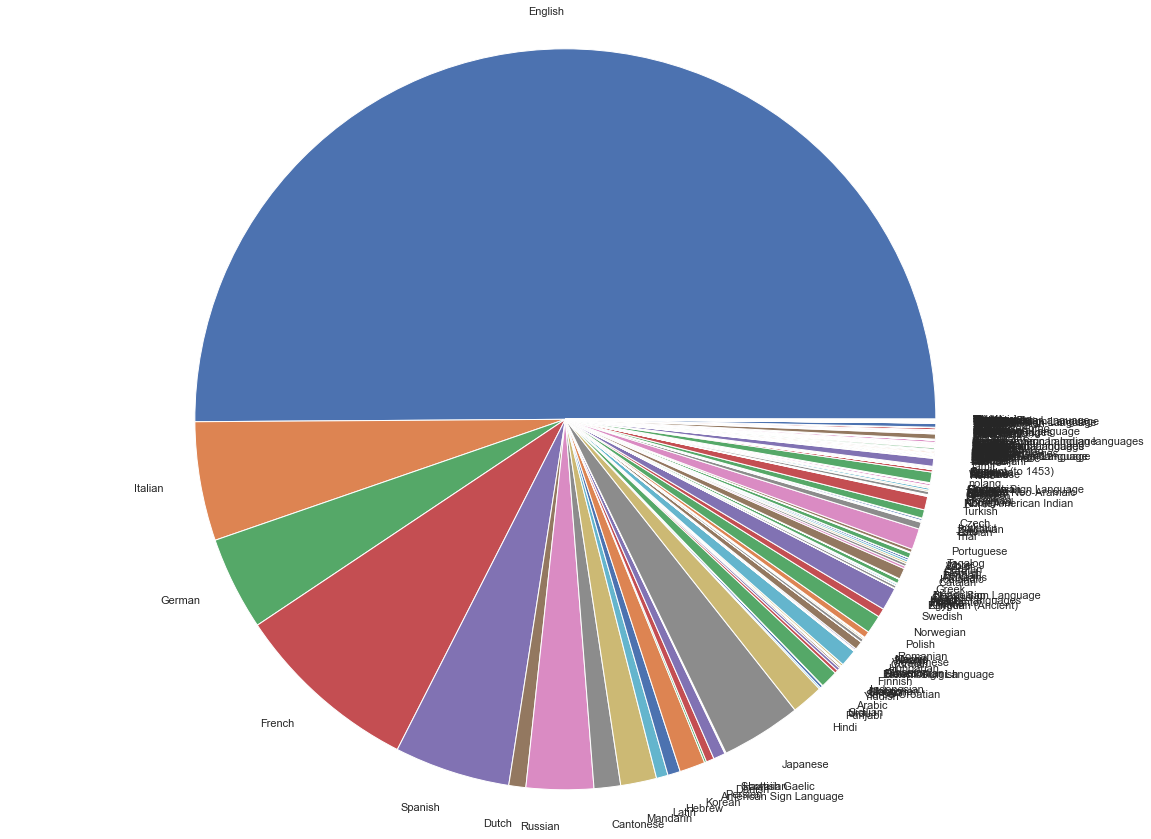

In [129]:
keys = freq.keys()
values = freq.values()

plt.subplots(figsize=(20,15))
plt.pie(values, labels=keys)

plt.axis('equal')
plt.show()

In [130]:
mylang = ['English' , 'French' , 'Italian','German','Spanish','Russian', 'Other']
for i in mylang:
    Movies_metadata[i] = 0

for index, row in Movies_metadata.iterrows():
#     print( index, row['imdb_title_id'], row['genres'])
    for subitem in row['language'].split(', '):
        if subitem in mylang:
            Movies_metadata.loc[index, subitem] = 1
        else:
            Movies_metadata.loc[index, "Other"] = 1

In [131]:
Movies_metadata[['language'] + mylang]

,language,English,French,Italian,German,Spanish,Russian,Other
2,"English, Italian, German",1,0,1,1,0,0,0
3,English,1,0,0,0,0,0,0
4,English,1,0,0,0,0,0,0
6,"English, French",1,1,0,0,0,0,0
7,English,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
41891,Japanese,0,0,0,0,0,0,1
41892,English,1,0,0,0,0,0,0
41893,French,0,1,0,0,0,0,0
41894,English,1,0,0,0,0,0,0


### Genre

In [132]:
%%time
# pd.options.mode.chained_assignment = None
all_genres = []

for item in Movies_metadata['genres']:
    for subitem in item.split('|'):
        if (subitem not in all_genres):
            all_genres.append( subitem )

            
for i in all_genres:
    Movies_metadata[i] = 0

for index, row in Movies_metadata.iterrows():
#     print( index, row['imdb_title_id'], row['genres'])
    for subitem in row['genres'].split('|'):
        Movies_metadata.loc[index, subitem] = 1

Wall time: 1min 36s


In [133]:
Movies_metadata[['genres'] + all_genres]

,genres,Comedy,Romance,Drama,Adventure,Children,Action,Horror,Animation,Crime,...,Mystery,Sci-Fi,Fantasy,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
2,Comedy|Romance,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Comedy|Drama|Romance,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Comedy,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Comedy|Romance,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Adventure|Children,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41891,Drama,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41892,Comedy,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41893,Comedy,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41894,Adventure|Drama|Horror|Sci-Fi,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [134]:
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39470 entries, 2 to 41895
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 39470 non-null  float64
 1   usa_gross_income       39470 non-null  float64
 2   worlwide_gross_income  39470 non-null  float64
 3   metascore              39470 non-null  float64
 4   reviews_from_users     39470 non-null  float64
 5   reviews_from_critics   39470 non-null  float64
 6   director_r             39470 non-null  float64
 7   votes                  39470 non-null  int64  
 8   genres                 39470 non-null  object 
 9   mean_vote              39470 non-null  float64
 10  original_title         39470 non-null  object 
 11  date_published         39470 non-null  object 
 12  duration               39470 non-null  float64
 13  genre                  39470 non-null  object 
 14  production_company     38561 non-null  object 
 15  ac

In [135]:
Movies_metadata.to_csv(Dataset_path +'Movies_metadata.csv', index=False)